# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# The Data
let's import the data set from csv file by importing file into pandas dataframe

In [13]:
titanic_data = pd.read_csv(r"C:\Users\shiva\Downloads\CODSOFT Internship\archive\tested.csv")

### Let's do some EDA with Data set to know more about set

In [15]:
titanic_data.head() 
#head function give top 5 rows of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
titanic_data.tail() 
#tail function give last 5 rows of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [18]:
titanic_data.shape
#shape function show us the number of rows or column that we have in dataset

(418, 12)

In [19]:
titanic_data.info()
#info function show us the info about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Missing Data

In [21]:
titanic_data.isnull().sum()
# null function shows us the missing values present in data set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
#drop function drop the "cabin" dataframe from the data set

In [23]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
#replacing the missing values in 'Age' column with mean value

In [24]:
print(titanic_data['Fare'].mode())
# finding the mode value of "Fare" column

0    7.75
Name: Fare, dtype: float64


In [25]:
print(titanic_data['Fare'].mode()[0])

7.75


In [28]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0],inplace=True)
#replacing the missing values in 'Fare' column with mode value

#### Now it succesfully  replace missing values 
and we see again our data frame

In [29]:
titanic_data.isnull().sum()
# null function shows us the missing values present in data set

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis


In [30]:
titanic_data.describe()
#describe function shows us the statistical measure about the data like mean.median.mode

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
titanic_data['Survived'].value_counts()
#finding the number of people Survived & not Survived

0    266
1    152
Name: Survived, dtype: int64

so here we get to know that from 418 people from our data only 152 people are survived weather 266 people are not survived

Data Visualization

In [34]:
sns.set()

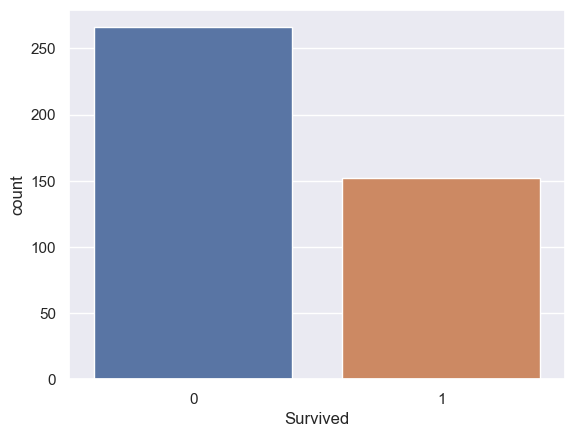

In [41]:
sns.countplot(x='Survived',data=titanic_data)
plt.show()
#ploting a countplot for "survived" column

In [46]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

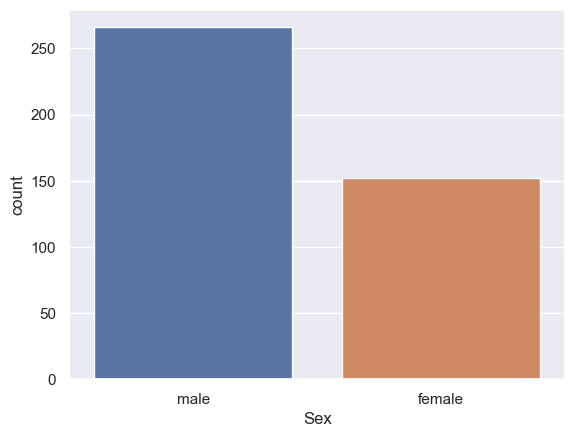

In [47]:
sns.countplot(x='Sex',data=titanic_data)
plt.show()
#ploting a countplot for "sex" column

<Axes: xlabel='Sex', ylabel='count'>

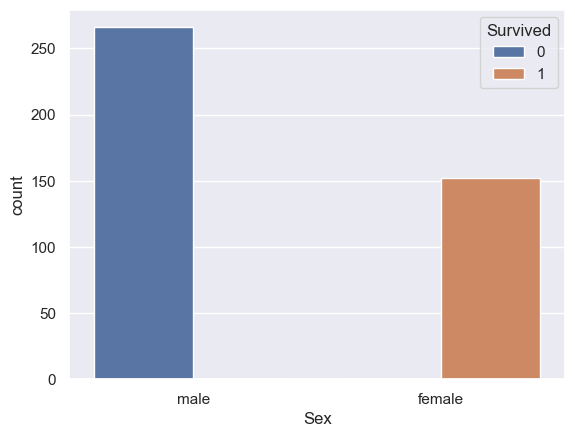

In [63]:
sns.countplot(x='Sex',data=titanic_data,hue='Survived')
# number of survived people by gender

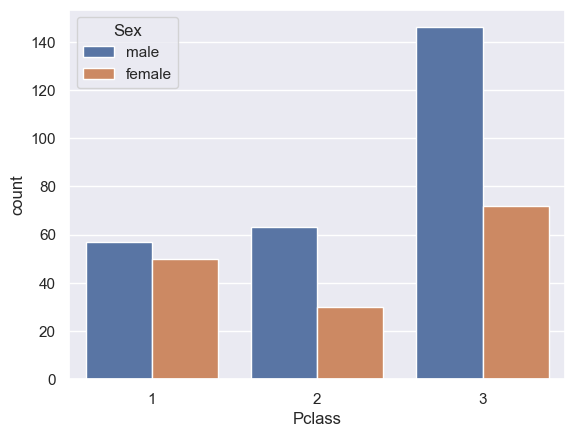

In [65]:
sns.countplot(x='Pclass', data = titanic_data , hue='Sex')
plt.show()
# countplot for pclass column

Encodoing the Categorical Columns

In [66]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [67]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [72]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}} ,inplace=True )
#Coverting categorical columns coz ML modle will understand numerical values better

In [73]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


what we here do is we change sex and embarked column into the numeric values

Seprating features & Target

In [74]:
x = titanic_data.drop(columns = ['PassengerId' , 'Name','Ticket','Survived'],axis = 1)
y = titanic_data['Survived']

In [75]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [76]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the data into trainig data & test data

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=2)

In [81]:
print(x.shape, x_train.shape, x_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training

## Building a Logistic Regression Model

In [82]:
model = LogisticRegression()

In [83]:
model.fit(x_train,y_train)
#training the logistic Regression modeel with training data


C:\Users\shiva\Videos\AnyDesk\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation


Accuracy Score

In [84]:
x_train_prediction = model.predict(x_train)
#accuracy on the trainig data

In [85]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [86]:
trainig_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of trainig data : ',trainig_data_accuracy)

Accuracy score of trainig data :  1.0


In [87]:
x_test_prediction = model.predict(x_test)
#accuracy on test data

In [88]:
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [89]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  1.0


As we can see the accuracy of training data and test data are same 100% so our prediction is 100% 